## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 8: Probability and Markov Processes
## Due 27 November, 2019 at 6:00 PM
### <span style="color: red">Paul Heng</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 8. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- Most of the section on basic graph theory is from chapter the really, really, really good book:

> Feller, [An Introduction to Probability Theory and Its Applications, Vol 1](https://www.amazon.com/Introduction-Probability-Theory-Applications-Vol/dp/0471257087), 3rd Edition, Wiley, 1968. 

- The material on Markov Chains can be found in numerous textbooks. A good online source is Chapter 11 of 

> Grinstead, [Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/book.html).



In [2]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

### 1. Fundamental properties

Use the definitions and basic properties of a probability function to show the following identities:

a) $P[A \oplus B] = P[A \cap \overline{B}] + P[\overline{A} \cap B]$ where $\oplus$ is the exclusive or operation. 

b) $P[A \oplus B] = P[A] + B[B] - 2 P[A\cap B]$.

a)

$P[A \cup B] = P[A] + P[B]$ whenever $A \cap B = \emptyset$

$P[A \oplus B] = P[(A \cap \overline B) \cup (\overline{A} \cap B)] \Longleftrightarrow P[A \cap \overline{B}] + P[\overline{A} \cap B]$

b)

$A \cap \overline B = A - (A \cap B)$ 

$\overline A \cap  B = B - (A \cap B)$ 

$P[A \oplus B] = P[A \cap \overline{B}] + P[\overline{A} \cap B] \Longleftrightarrow A - (A \cap B) + B - (A \cap B) = P[A] + B[B] - 2 P[A\cap B]$

## 2. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice. 

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

| n    | 1  | 2 | 3 | 4 | 5 | 6 |
|------|----|---|---|---|---|---|
| p(n) | 2a | a | a | a | a | a |

| D1/D2 | 1      | 2     | 3     | 4     | 5     | 6     |
|-------|--------|-------|-------|-------|-------|-------|
| 1     | (2a)^2 | (2a)a | (2a)a | (2a)a | (2a)a | (2a)a |
| 2     | (2a)a  | a^2   | a^2   | a^2   | a^2   | a^2   |
| 3     | (2a)a  | a^2   | a^2   | a^2   | a^2   | a^2   |
| 4     | (2a)a  | a^2   | a^2   | a^2   | a^2   | a^2   |
| 5     | (2a)a  | a^2   | a^2   | a^2   | a^2   | a^2   |
| 6     | (2a)a  | a^2   | a^2   | a^2   | a^2   | a^2   |

| D1/D2 | 1    | 2    | 3    | 4    | 5    | 6    |
|-------|------|------|------|------|------|------|
| 1     | 4/49 | 2/49 | 2/49 | 2/49 | 2/49 | 2/49 |
| 2     | 2/49 | 1/49 | 1/49 | 1/49 | 1/49 | 1/49 |
| 3     | 2/49 | 1/49 | 1/49 | 1/49 | 1/49 | 1/49 |
| 4     | 2/49 | 1/49 | 1/49 | 1/49 | 1/49 | 1/49 |
| 5     | 2/49 | 1/49 | 1/49 | 1/49 | 1/49 | 1/49 |
| 6     | 2/49 | 1/49 | 1/49 | 1/49 | 1/49 | 1/49 |

a) 8/49 (a = 1/7)

b) 1/7

c) 25/49

d)

2 = 4/49
3 = 4/49
4 = 5/49
5 = 6/49
6 = 7/49
7 = 8/49
8 = 5/49
9 = 4/49
10 = 3/49
11 = 2/49
12 = 1/49

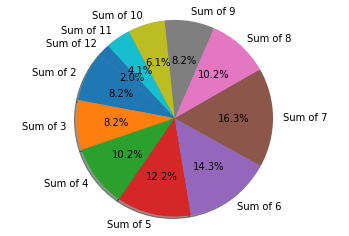

In [4]:
sum2 = 4/49
sum3 = 4/49
sum4 = 5/49
sum5 = 6/49
sum6 = 7/49
sum7 = 8/49
sum8 = 5/49
sum9 = 4/49
sum10 = 3/49
sum11 = 2/49
sum12 = 1/49

import matplotlib.pyplot as plt

# Data to plot
labels = 'Sum of 2', 'Sum of 3', 'Sum of 4', 'Sum of 5', 'Sum of 6', 'Sum of 7', 'Sum of 8','Sum of 9', 'Sum of 10', 'Sum of 11', 'Sum of 12'
sizes = [4/49, 4/49, 5/49, 6/49, 7/49, 8/49, 5/49, 4/49, 3/49, 2/49, 1/49]
# Plot
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## 3. PDF and CDF

Suppose that a random variable $X$ has PDF defined by

$$
f_X(x) = \left \{
\begin{array}{ll}
a(1+x) & \; \mathrm{if} \; -1 < x \leq 0 \\
a(1-x) & \; \mathrm{if} \; 0 < x < 1 \\
0 & \; \mathrm{otherwise}.
\end{array}
\right .
$$

a) What does the value of $a$ need to be to make $f_X$ a probability distribution? Plot $f_X$ for this value.

b) Find and plot $F_X$.

c) Find $b$ such that $P[X>b] = \frac{1}{2} P[X \leq b]$. 

$
\int_{-\infty}^{\infty}f_x (x)dx = 1 = \int_{-1} ^ {0} a (1+x)dx + \int_{0}^{1}a(1-x)dx = a
$

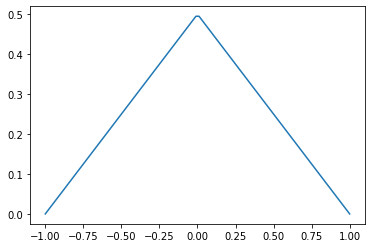

In [5]:
# An example
x = np.linspace(-1,1,100) # Has 100 points
a = 0.5

xs = x[x <= 0]
f = list(np.where(xs, a * (1 + xs), 0)) # f(x) where x <= 0 Only has 50 points

xs = x[x > 0]
f += list(np.where(xs, a * (1 - xs), 0))# f(x) where x > 0 Only has 50 points

plt.plot(x,f)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [6]:
a = sm.symbols("a")
x = sm.symbols("x")
sm.integrate((a * (1 + x)), (x, -1, x))

   2          
a⋅x          a
──── + a⋅x + ─
 2           2

In [7]:
a = sm.symbols("a")
x = sm.symbols("x")
sm.integrate((a * (1 - x)), (x, 0, x))

     2      
  a⋅x       
- ──── + a⋅x
   2        

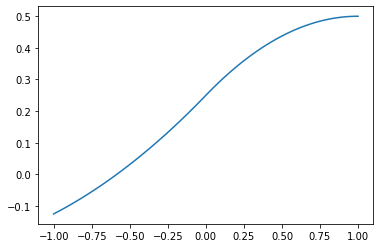

In [8]:
# An example
x = np.linspace(-1,1,100) # Has 100 points
a = 0.5

xs = x[x <= 0]
f = list(np.where(xs, (((a * xs) ** 2) / 2) + (a * xs) + (a / 2) , 0)) # f(x) where x <= 0 Only has 50 points

xs = x[x > 0]
f += list(np.where(xs, (a / 2) -((a * xs) ** 2) + (a * xs), 0))# f(x) where x > 0 Only has 50 points

plt.plot(x,f)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## 4. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise. 

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$. 

c) Let $Z = - \frac{1}{\lambda} \ln X$. Find and plot $F_Z$ and $f_Z$. 

$F_X (x) = 0$, if $ x<0$

$F_X (x) = 1$, if $ x>1$

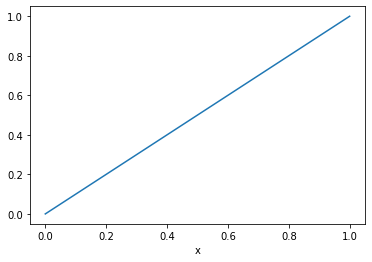

In [81]:
y = sm.symbols("y")
t = sm.symbols("t")
sm.integrate(1, (t, 0, 1))

# An example
x = np.linspace(0,1,100) # Has 100 points
a = 0.5

xs = x
f = list(np.where(xs, xs , 0)) # f(x) where x <= 0 Only has 50 points

plt.plot(x,f)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

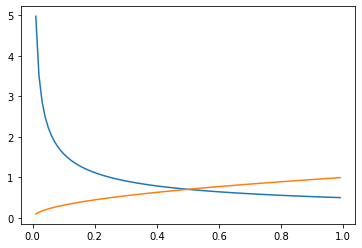

In [41]:
y = sm.symbols("y")
t = sm.symbols("t")
sm.integrate(1, (t, 0, sm.sqrt(y)))

x = np.linspace(0,1,100)

def f(x):
    if 0 < x < 1:
        return .5 / np.sqrt(x)
    if x > 1:
        return 1
    if x < 0:
        return 0

def F(x):
    if 0 < x < 1:
        return np.sqrt(x)
    if x > 1:
        return 1
    if x < 0:
        return 0
y = []
y2 = []

for i in x:
    y.append(f(i))
    y2.append(F(i))
    
plt.plot(x,y)
plt.plot(x,y2)
plt.show()

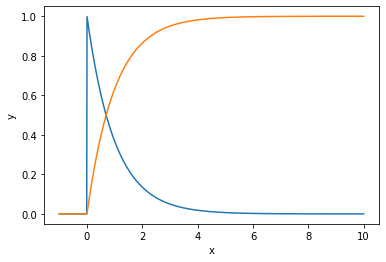

In [82]:
y = sm.symbols("y")
t = sm.symbols("t")
sm.integrate(1, (t, 0, sm.sqrt(y)))

x = np.linspace(-1,10,1000)

def f(x):
    if x > 0:
        return np.exp(-x)
    if x <= 0:
        return 0

def F(x):
    if x > 0:
        return 1 - np.exp(-x)
    if x <= 0:
        return 0
y = []
y2 = []

for i in x:
    y.append(f(i))
    y2.append(F(i))
    
plt.plot(x,y)
plt.plot(x,y2)

plt.ylabel('y')
plt.xlabel('x')
plt.show()

## 5. Markov Process Properties

Consider the following three Markov Processes.

<img src="https://github.com/klavins/EE502P/blob/master/images/HW-MPs.jpeg?raw=1" width=80%>

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

I) 

a) None

b) None

c) State 0 = No Period, State 1,2,3,4,5,6 = Period 2

II)

C0 is a transient state.

III)

No absorbing statesm only absorbing subsets of (1,2) , (3,4), and (5,6)

IV)

All states in section A

## 6. Stationary Distributions

For each Markov Process in Problem 5:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a nice plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this). 

iii) Find the left eigenvector(s) corresponding to the stationary distribution(s) of the process. If there is more than one such eigenvector, describe the space of stationary distributions as a linear combination of them.

iv) Find the reachable stationary distribution assuming $p_0(0) = 1$. 

|   | 0   | 1   | 2   |
|---|-----|-----|-----|
| 0 | 0   | 0.5 | 0.5 |
| 1 | 0.5 | 0   | 0.5 |
| 2 | 0.5 | 0.5 | 0   |

|   | 0   | 1 | 2 | 3   |
|---|-----|---|---|-----|
| 0 | 0   | 1 | 0 | 0   |
| 1 | 0   | 0 | 1 | 0   |
| 2 | 0   | 0 | 0 | 1   |
| 3 | 0.5 | 0 | 0 | 0.5 |

|   | 0 | 1   | 2 | 3    | 4 | 5    | 6 |
|---|---|-----|---|------|---|------|---|
| 0 | 0 | 0.5 | 0 | 0.25 | 0 | 0.25 | 0 |
| 1 | 0 | 0   | 1 | 0    | 0 | 0    | 0 |
| 2 | 0 | 1   | 0 | 0    | 0 | 0    | 0 |
| 3 | 0 | 0   | 0 | 0    | 1 | 0    | 0 |
| 4 | 0 | 0   | 0 | 1    | 0 | 0    | 0 |
| 5 | 0 | 0   | 0 | 0    | 0 | 0    | 1 |
| 6 | 0 | 0   | 0 | 0    | 0 | 1    | 0 |

In [61]:
# 6.ii)

def dynamics(k, Q, p):
    '''
    Assumes k is the numer of steps
            Q is the update matrix
            p0 is the starting distribution.
    Returns a matrix of trajectories.
    '''
    trajectory = [p]
    for t in range(k):
        p = p @ Q
        trajectory.append(p)
    trajectory = np.matrix(trajectory).transpose()

    return trajectory

def dynamics_reach(k, Q, p):
    '''
    Assumes k is the numer of steps
            Q is the update matrix
            p0 is the starting distribution.
    Returns a matrix of trajectories.
    '''
    trajectory = [p]
    for t in range(k):
        p = p @ Q
        trajectory.append(p)
    trajectory = np.matrix(trajectory).transpose()

    #return trajectory
    
    return p * Q ** k


In [63]:
def Qa(Qa, sympy=True):
    '''
    Assumes:    
    Returns:
    '''
    a = 0.5
    b = 0.25
    #Qa = [[0.0, a, a], [a, 0.0, a], [a, a, 0.0]]
    if sympy == True:
        Qa = sm.Matrix(Qa)
    else:    
        Qa = np.asarray(Qa)
    return Qa

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


[(-0.5, 2, [[-1.0  1.0  0], [-1.0  0  1.0]]), (1.0, 1, [[1.0  1.0  1.0]])]

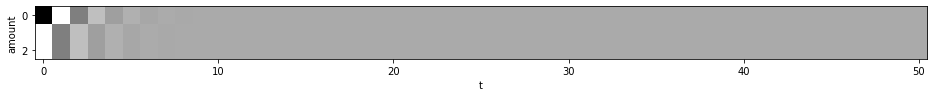

In [102]:
P = np.array([[0, 0.5, 0.5], 
              [0.5, 0, 0.5],
              [0.5, 0.5, 0]])

p = [0, .5, .5]
p = [1, 0, 0]

trajectory = dynamics(50, P, p)
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.set_xlabel("t")
ax.set_ylabel("amount")
ax.imshow(trajectory,cmap="gray_r")

print(dynamics_reach(2000, P, p))
Qa(P, sympy=True).left_eigenvects()

[[0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.  0.  0.  0.4]
 [0.  0.  0.  0. ]]


[(1.0, 1, [[0.5  0.5  0.5  1.0]]), (0.119491810752253 + 0.813834558901752⋅ⅈ, 1
, [[0.0883024910498311 - 0.601410409642739⋅ⅈ  -0.707794301802084 - 0.212424149
259013⋅ⅈ  -0.380508189247747 + 0.813834558901752⋅ⅈ  1.0]]), (0.119491810752253
 - 0.813834558901752⋅ⅈ, 1, [[0.0883024910498311 + 0.601410409642739⋅ⅈ  -0.7077
94301802084 + 0.212424149259013⋅ⅈ  -0.380508189247747 - 0.813834558901752⋅ⅈ  1
.0]]), (-0.738983621504506, 1, [[-0.676604982099662  0.915588603604168  -1.238
98362150451  1.0]])]

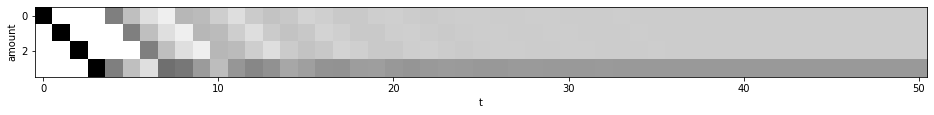

In [65]:
P = np.array([[0, 1, 0, 0], 
              [0, 0, 1, 0],
              [0, 0, 0, 1],
              [0.5, 0, 0, 0.5]
             ])

#p = [0, .5, .5]
p = [1, 0, 0, 0]

trajectory = dynamics(50, P, p)
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.set_xlabel("t")
ax.set_ylabel("amount")
ax.imshow(trajectory,cmap="gray_r")

print(dynamics_reach(2000, P, p))
Qa(P, sympy=True).left_eigenvects()

[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25]
 [0.   0.   0.   0.   0.   0.   0.  ]]


[(-1.0, 3, [[0  -1.0  1.0  0  0  0  0], [0  0  0  -1.0  1.0  0  0], [0  0  0  
0  0  -1.0  1.0]]), (0, 1, [[-4.0  0  2.0  0  1.0  0  1.0]]), (1.0, 3, [[0  1.
0  1.0  0  0  0  0], [0  0  0  1.0  1.0  0  0], [0  0  0  0  0  1.0  1.0]])]

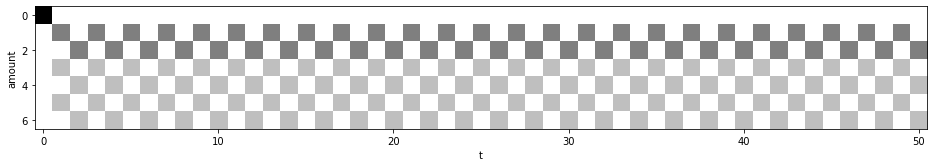

In [103]:
P = np.array([[0, .5, 0, .25, 0, .25, 0], 
              [0, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 0]
             ])

p = [1, 0, 0, 0, 0, 0, 0]

trajectory = dynamics(50, P, p)
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.set_xlabel("t")
ax.set_ylabel("amount")
ax.imshow(trajectory,cmap="gray_r")

print(dynamics_reach(2000, P, p))
Qa(P, sympy=True).left_eigenvects()

a) Mean: $\frac{1}{3} + \frac{1}{3} +\frac{1}{3} = 1$

b) Mean: $ \frac{1}{5} + \frac{1}{5} + \frac{1}{5} + \frac{2}{5} = 1$

c) Mean: $ \frac{1}{4} + \frac{1}{4} + \frac{1}{8} + \frac{1}{8} + \frac{1}{8} + \frac{1}{8} =1$

## 7. Means and standard deviations

For each process in problem 6, find the mean and standard deviation of the value of the state in the reachable stationary distribution. For example, in process (a), the stationary distribution has all states equally likely, so the mean would be $\frac{1}{3} (0+1+2) = 1$. 

a) Mean: $\frac{1}{3}(0 + 1 + 2) = 1$

b) Mean: $ \frac{1}{5}(0 + 1 + 2) + \frac{2}{5}(3) = 1.8$

c) Mean: $ \frac{1}{4}(0 + 1) + \frac{1}{8}(2 + 3 + 4 + 5 + 6)= 2.75$

In [76]:
u = (0 + 1 + 2) / 3
ex1 = (0 + 1 + 4) / 3

np.sqrt(ex1 - (u ** 2))

0.816496580927726

In [79]:
u = ((0 + 1 + 2) / 5) + ((2/5) * 3)
ex1 = ((0 + 1 + 4) / 5) + ((2/5) * 9)

np.sqrt(ex1 - (u ** 2))

1.1661903789690595

In [80]:
u = ((0 + 1) / 4) + ((1/8) * 20)
ex1 = ((0 + 1) / 4) + ((1/8) * (2**2 + 3**2 + 4**2 + 5**2 + 6**2))

np.sqrt(ex1 - (u ** 2))

1.984313483298443

## 8. The Page Rank Algorithm

For the following problem, use the `networkx` `pagerank` function or find the eigenvector of the graph as a Markov Process corresponding to the eigenvector 1. Use undirected graphs.

a) Find a 10 node, connected graph in which all nodes are ranked equally or explain why such a graph does not exist.

b) Find a 10 node, connected graph in which all nodes are ranked differently or explain why such a graph does not exist.

c) Find a 10 node, connected graph in which there are two sets $A$ and $B$ of $5$ nodes for which all nodes in $A$ are ranked the same and all nodes in $B$ are ranked the same, but different from nodes in $A$. Or explain why such a graph does not exist.

dict_values([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

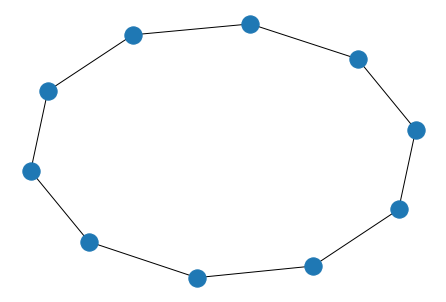

In [58]:
# Alternatively, we build a graph and have networkx do the work
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])


G.add_edges_from([(0,1),
                  (1,2),
                  (2,3),
                  (3,4),
                  (4,5),
                  (5,6),
                  (6,7),
                  (7,8),
                  (8,9),
                  (9,0)
                 ])

nx.draw(G)

nx.pagerank(G).values()

dict_values([0.12300046398427997, 0.18158456840956294, 0.07365149655819675, 0.03429332886561459, 0.04630296617242602, 0.08656824976065733, 0.10429899914035123, 0.10429899914035123, 0.12300046398427995, 0.12300046398427995])

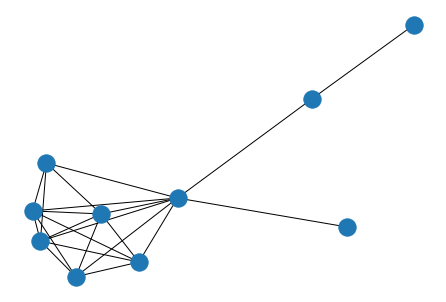

In [57]:
# Alternatively, we build a graph and have networkx do the work
# Can't build a undirected graph with equal rank.

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])


G.add_edges_from([(0,1),(0,5),(0,6),(0,7),(0,8),(0,9),
                  (1,2),(1,3),(2,4),(1,5),(1,6),(1,8),(1,9),
                  (5,8),(5,9),
                  (6,7),(6,8),(6,9),
                  (7,8),(7,9),(7,1),
                  (8,9),
                 ])

nx.draw(G)

nx.pagerank(G).values()

dict_values([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

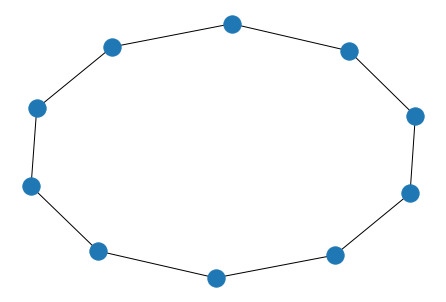

In [25]:
# Alternatively, we build a graph and have networkx do the work
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])


G.add_edges_from([(0,1),
                  (1,2),
                  (2,3),
                  (3,4),
                  (4,5),
                  (5,6),
                  (6,7),
                  (7,8),
                  (8,9),
                  (9,0)
                 ])

nx.draw(G)

nx.pagerank(G).values()

/Users/paulheng/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


dict_values([0.055844303063507836, 0.055844303063507836, 0.055844303063507836, 0.055844303063507836, 0.055844303063507836, 0.14415569693649213, 0.1441556969364921, 0.1441556969364921, 0.1441556969364921, 0.14415569693649213])

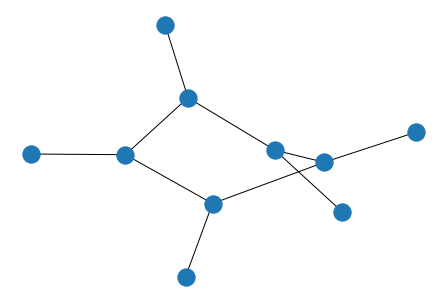

In [22]:
# Alternatively, we build a graph and have networkx do the work
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])


G.add_edges_from([(0,5), # node a
                  (1,6),
                  (2,7),
                  (3,8),
                  (4,9),
                  
                  (5,6), # node b
                  (6,7),
                  (7,8),
                  (8,9),
                  (9,5)
                 ])

nx.draw(G)

nx.pagerank(G).values()